**Table of contents**<a id='toc0_'></a>    
- 1. [Preliminaries](#toc1_)    
- 2. [Possible set - C.](#toc2_)    
- 3. [Errors from $p_1 \in \mathcal{P}_1$](#toc3_)    
- 4. [Market clearing price](#toc4_)    
- 5. [Individual optimization](#toc5_)    
  - 5.1. [Optimizing under C](#toc5_1_)    
  - 5.2. [Optimizing over the infinite set between 0 and 1](#toc5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Preliminaries](#toc0_)

In [2]:
import matplotlib.pyplot as plt
from scipy import optimize 

import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


%load_ext autoreload
%autoreload 2

In [3]:
# import modelclass from ExchangeEconomy.py
from ExchangeEconomy import ExchangeEconomyClass

## 2. <a id='toc2_'></a>[Possible set - C.](#toc0_)

In [4]:
model = ExchangeEconomyClass()

N = 75

w1A = 0.8
w2A = 0.3

x1A = np.linspace(0,1,N+1)
x2A = x1A.copy()

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B((1-x1),(1-x2)) >= model.utility_B(1-w1A,1-w2A):
            x1possible.append(x1)
            x2possible.append(x2)

print(x1possible[0:5])


[0.08, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334]


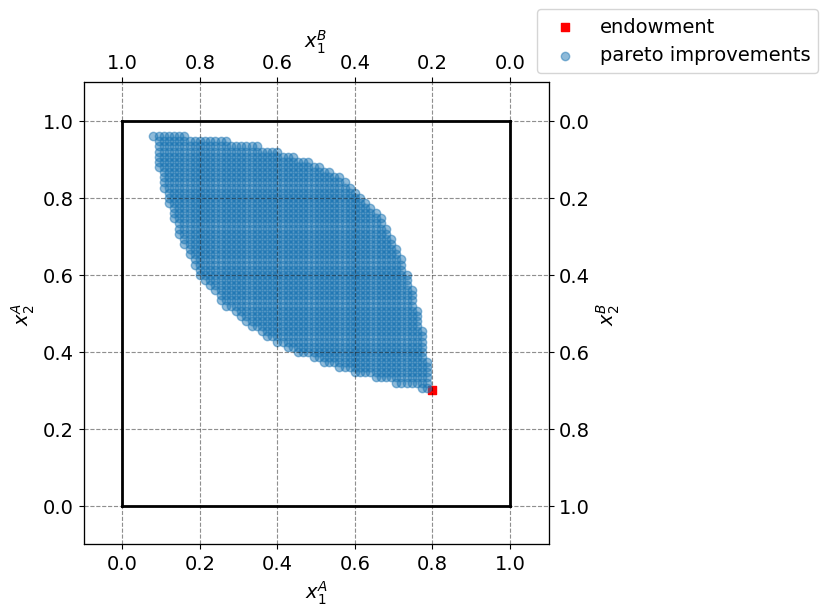

In [16]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x1possible,x2possible, alpha=0.5, label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.6,1.0));

## 3. <a id='toc3_'></a>[Errors from $p_1 \in \mathcal{P}_1$](#toc0_)

[(0.533333333333333, -0.2666666666666666), (0.47594936708860747, -0.25066666666666654), (0.42409638554216866, -0.23466666666666652), (0.3770114942528735, -0.2186666666666665), (0.334065934065934, -0.2026666666666665)]


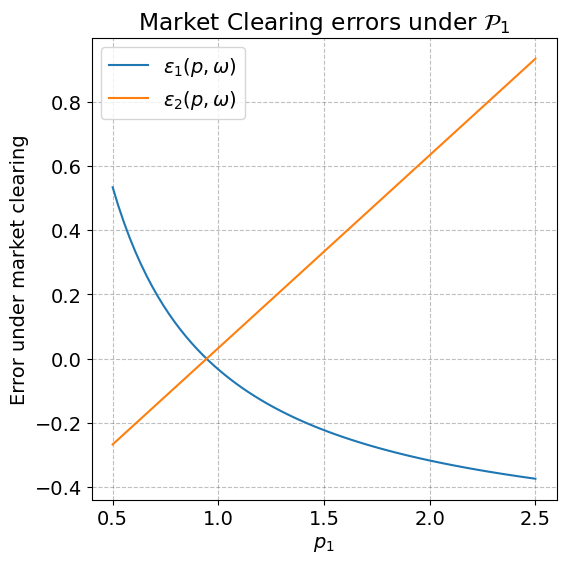

In [42]:
# Initialize empty list
p1 = []

# Fill the list by looping
for i in range(N+1):
    p1.append(0.5 + 2*i/N)

# Initialize empty list
error = []

# Calculate errors (eps1,eps2) using the check_market_clearing func from ExchangeEconomy.py and filling list
for i in p1:
    error.append(model.check_market_clearing(i))

# check 
print(error[0:5])

# unpack tuple list error 
error1,error2 = zip(*error)

# plot of errors 
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_C = fig.add_subplot(1, 1, 1)

ax_C.set_ylabel("Error under market clearing")
ax_C.set_xlabel("$p_1$")
ax_C.set_title("Market Clearing errors under $\mathcal{P}_1$")

ax_C.plot(p1, error1, label = '$\epsilon_1(p,\omega)$')
ax_C.plot(p1, error2, label = '$\epsilon_2(p,\omega)$')
ax_C.legend()

## 4. <a id='toc4_'></a>[Market clearing price](#toc0_)

The market clearing price, is the choice of $p_1$, that make both errors as low as possible, preferably close to zero.  

## 5. <a id='toc5_'></a>[Individual optimization](#toc0_)

In this part of the assignment, agent A maximizes their own utility under the restriction that agent B is not worse of than in the initial endowment. 

### 5.1. <a id='toc5_1_'></a>[Optimizing under C](#toc0_)

In [9]:
# Agent A optimizes utility of x1A, x2A under the set C

# Model params (not needed)

alpha = 1/3 
beta = 1-alpha 

# Brute force initial conditions
uAmax = -np.inf
x1best = -np.inf
x2best = -np.inf

# loops
for x1 in x1possible:
    for x2 in x2possible:
        uAnew = model.utility_A(x1,x2)
        if model.utility_A(x1,x2) > uAmax:
            uAmax = uAnew
            x1best = x1 
            x2best = x2

print(f'Utility A max = {uAmax:.3f}: (x1A,x2A) = ({x1best:.3f},{x2best:.3f})')
print(f'Utility B max = {model.utility_B(1-x1best,1-x2best):.3f}: (x1B,x2B) = ({1-x1best:.3f},{1-x2best:.3f})')

# using a solver 

sol_case = optimize.minimize(model.utility_A(x1possible, x2possible) ) 

Utility A max = 0.898: (x1A,x2A) = (0.787,0.960)
Utility B max = 0.122: (x1B,x2B) = (0.213,0.040)


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'float'

### 5.2. <a id='toc5_2_'></a>[Optimizing over the infinite set between 0 and 1](#toc0_)

In [10]:
# Agent A optimizes utility under no further restrictions
# This is an almost identical problem, the only change, is x1A, x2A exist on the real axis in [0:1]
# Thus if N was sufficiently large in 5.a, the same solution should appear, if not, the opposite.

# Using brute force again

# Setting high N, simulating large set of numbers in [0:1]
N = 2000

# Set initial conditions
x1possible = np.linspace(0,1,N)
x2possible = np.linspace(0,1,N)
uAmax = model.utility_A(0,0)
x1best = -np.inf
x2best = -np.inf

# Just checking utility of B from initial endownments. 
print(f'$u^B(w1B,w2B)$ = {model.utility_B(1-par.w1A, 1-par.w2A):.3f}')

# similar loop as 5.a 
for x1A in x1possible:
    for x2A in x2possible:
        uAnew = model.utility_A(x1A,x2A)
        if model.utility_A(x1A,x2A) > uAmax and model.utility_B(1-x1A,1-x2A) >= model.utility_B(1-par.w1A,1-par.w2A):
            uAmax = uAnew
            x1best = x1 
            x2best = x2

print(f'Utility A max = {uAmax:.3f}: (x1A,x2A) = ({x1best:.3f},{x2best:.3f})')
print(f'Utility B max = {model.utility_B(1-x1best,1-x2best):.3f}: (x1B,x2B) = ({1-x1best:.3f},{1-x2best:.3f})')

$u^B(w1B,w2B)$ = 0.304
Utility A max = 0.743: (x1A,x2A) = (0.787,0.373)
Utility B max = 0.306: (x1B,x2B) = (0.213,0.627)


In [ ]:
# Cannot be true, A should have atleast as high utility as in 5.b